# Trend Analysis: Comprehensive Data Cleaning

This project takes a customer sales dataset for a fictional electronics company and walks through necessary steps for efficient data analysis, including comprehensive data cleaning. The goal is to ensure accurate data for effective analysis and visualization, producing valuable insights for key decision-making.

## Install necessary libraries

In [1]:
!pip install pandas seaborn matplotlib

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/e1/0c/ad295fd74bfac85358fd579e271cded3ac969de81f62dd0142c426b9da91/pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/35/3e/5713b84a02b24b2a4bd4d6673bfc03017e6654e1d8793ece783b7ed4d484/matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.9.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/56/44/f899b0581766c230da42f751b7b8896d0

## Import necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

Here, we load the dataset to explore its structure and content, starting with visualizing the first few rows.

In [3]:
# Load dataset
df = pd.read_csv('customer_sales.csv')

# View first few rows
df.head()

,CustomerID,Name,Email,PurchaseDate,Product,Quantity,UnitPrice,TotalAmount
0,CUST00001,James Parker Jr.,lorimatthews@example.net,24/11/2020,Router,2.0,80.0,160.0
1,CUST00001,James Parker Jr.,lorimatthews@example.net,24/11/2020,Router,2.0,80.0,160.0
2,CUST00003,Margaret Weaver,vbutler@example.org,11/11/2015,Smartwatch,1.0,200.0,-2.0
3,CUST00004,Eric Vega,ubarnes@example.org,18/1/2024,Laptop,1.0,1000.0,3000.0
4,CUST00005,Alyssa Smith,goodmannichole@example.org,30/6/2024,Tablet,2.0,400.0,800.0


## Data overview

Here, we check the dataset's structure further, including the data types of each column and the prescence of any missing values.

In [4]:
# Identify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    9997 non-null   object 
 1   Name          9998 non-null   object 
 2   Email         9997 non-null   object 
 3   PurchaseDate  10000 non-null  object 
 4   Product       10000 non-null  object 
 5   Quantity      9996 non-null   float64
 6   UnitPrice     9997 non-null   float64
 7   TotalAmount   9996 non-null   float64
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [5]:
# Check for missing values
df.isnull().sum()

CustomerID      3
Name            2
Email           3
PurchaseDate    0
Product         0
Quantity        4
UnitPrice       3
TotalAmount     4
dtype: int64

In [6]:
# Show rows with missing values
df[df.isnull().any(axis=1)]

,CustomerID,Name,Email,PurchaseDate,Product,Quantity,UnitPrice,TotalAmount
11,CUST00015,Mary Mathews,NaN,28/10/2021,Camera,1.0,500.0,500.0
16,CUST00020,David Campbell,NaN,5/4/2021,Laptop,1.0,1000.0,4000.0
28,CUST00032,NaN,ysmith@example.com,21/11/2016,Microphone,5.0,130.0,650.0
32,CUST00036,Alicia Marks,NaN,7/7/2021,Router,3.0,80.0,240.0
216,CUST00220,Brian Johnson,portiz@example.com,6/1/2016,Smartphone,NaN,700.0,2100.0
223,CUST00227,Mary Murphy,justin86@example.com,6/2/2016,Keyboard,NaN,100.0,200.0
255,CUST00259,Laura Henderson,peter95@example.com,19/8/2022,Keyboard,NaN,100.0,200.0
296,CUST00300,Vanessa Gibson,rickybrown@example.org,19/3/2017,Tablet,NaN,400.0,400.0
417,CUST00421,Sean Fisher,nicholasbernard@example.net,17/6/2019,Headphones,5.0,NaN,750.0
520,CUST00524,Mrs. Lisa Wood,brianfrank@example.net,4/2/2017,Speaker,4.0,NaN,720.0


## Handle missing values

Here, we handle the missing values identified in the dataset by dropping and imputing data, depending on the nature of the column.

In [7]:
def handle_missing_values(df):
    """
    Function to handle missing values using various strategies.
    
    :param df: DataFrame with missing values.
    :return: DataFrame without missing values.
    """
    # Drop rows with missing values in critical columns
    df.dropna(subset=['CustomerID', 'Name', 'Email'], inplace=True)

    # Impute 'Quantity' where missing
    mask_quantity = (
        df['Quantity'].isnull() &
        df['TotalAmount'].notnull() &
        df['UnitPrice'].notnull()
    )
    df.loc[mask_quantity, 'Quantity'] = (
        df.loc[mask_quantity, 'TotalAmount'] /
        df.loc[mask_quantity, 'UnitPrice']
    )

    # Impute 'UnitPrice' where missing
    mask_unitprice = (
        df['UnitPrice'].isnull() &
        df['TotalAmount'].notnull() &
        df['Quantity'].notnull()
    )
    df.loc[mask_unitprice, 'UnitPrice'] = (
        df.loc[mask_unitprice, 'TotalAmount'] /
        df.loc[mask_unitprice, 'Quantity']
    )

    # Impute 'TotalAmount' where missing
    mask_totalamount = (
        df['TotalAmount'].isnull() &
        df['Quantity'].notnull() &
        df['UnitPrice'].notnull()
    )
    df.loc[mask_totalamount, 'TotalAmount'] = (
        df.loc[mask_totalamount, 'Quantity'] *
        df.loc[mask_totalamount, 'UnitPrice']
    )

    return df

df = handle_missing_values(df)

## Checking for duplicates

Next, we check for any duplicate rows in the dataset and remove them to ensure data integrity.

In [8]:
# Check for duplicate rows
df[df.duplicated(keep=False)]

,CustomerID,Name,Email,PurchaseDate,Product,Quantity,UnitPrice,TotalAmount
0,CUST00001,James Parker Jr.,lorimatthews@example.net,24/11/2020,Router,2.0,80.0,160.0
1,CUST00001,James Parker Jr.,lorimatthews@example.net,24/11/2020,Router,2.0,80.0,160.0


In [9]:
# Drop exact duplicates
df.drop_duplicates(inplace=True)

## Detect partial duplicates

We also check for partial duplicates in the data based on key identifiers, to ensure any remaining duplicates are valid.

In [10]:
# Detect partial duplicates based on key identifiers
df[df.duplicated(subset=['CustomerID', 'Name', 'Email'], keep=False)]

,CustomerID,Name,Email,PurchaseDate,Product,Quantity,UnitPrice,TotalAmount
71,CUST00075,David Jennings,reginaramirez@example.org,18/5/2021,Printer,5.0,250.0,1250.0
72,CUST00075,David Jennings,reginaramirez@example.org,22/3/2015,Speaker,1.0,180.0,180.0


## Standardizing dates

We standardize the date format to maintain consistency across the dataset. This ensures that all dates follow the same format.

In [11]:
# Standardisz dates
def standardize_dates(df, column, dayfirst=False):
    """
    Function to standardize dates.
    
    :param df: DataFrame containing date column.
    :param column: Column to be standardized.
    :param dayfirst: Indicates if day comes first in the date format.
    :return: DataFrame with standardized date formats.
    """
    df[column] = pd.to_datetime(df[column], dayfirst=dayfirst).dt.strftime('%Y/%m/%d')
    return df

df = standardize_dates(df, 'PurchaseDate', dayfirst=True)

## Standardize capitalization

Here, we standardize capitalization to ensure uniformity.

In [12]:
# Standardize capitalisation
def standardize_capitalisation(df, columns):
    '''
    Function to standardize capitalisation.
    
    :param df: DataFrame containing columns.
    :param columns: List of columns to be standardized.
    :return: DataFrame with standardized capitalisation.
    '''
    for column in columns:
        # Get the first entry for each column
        first_entry = df[column].iloc[0]
        
        # Determine the capitalisation style of the first entry
        if first_entry.islower():
            case = 'lower'
        elif first_entry.isupper():
            case = 'upper'
        else:
            case = 'title'
        
        if case == 'lower':
            df[column] = df[column].str.lower()
        elif case == 'upper':
            df[column] = df[column].str.upper()
        else:
            df[column] = df[column].str.title()
            
    return df

df = standardize_capitalisation(df, ['Name', 'Email', 'Product'])

## Converting data types

We ensure numerical values are of the correct data type and monetary values are rounded to two decimal places.

In [13]:
# Convert data types
df['Quantity'] = df['Quantity'].astype(int)
df['UnitPrice'] = df['UnitPrice'].astype(float)

# Round monetary values to two decimal places
df[['UnitPrice', 'TotalAmount']] = df[['UnitPrice', 'TotalAmount']].round(2)

## Removing leading/trailing spaces

To avoid inconsistencies due to accidental spaces, we remove leading and trailing spaces from all string columns.

In [14]:
# Remove leading/trailing spaces from string columns
def remove_spaces(df):
    """
    Function to remove leading/trailing spaces from string columns.
    
    :param df: DataFrame to process.
    :return: DataFrame with stripped string columns.
    """
    # Select columns with 'object' (string) dtype
    object_columns = df.select_dtypes(include='object').columns
    
    for column in object_columns:
        df[column] = df[column].str.strip()
        
    return df

df = remove_spaces(df)

## Checking for typos

We check for and correct any typos errors in the 'Product' column.

In [15]:
# Check unique values in product column to ensure no typos
df['Product'].unique()

array(['Router', 'Smartwatch', 'Laptop', 'Tablet', 'Printer', 'Camera',
       'Microphone', 'Monitor', 'Speaker', 'Mouse', 'Keyboard',
       'Smartphone', 'External Hard Drive', 'Usb Flash Drive',
       'Headphones'], dtype=object)

In [16]:
# Correct typos
corrections = {
    'Spker': 'Speaker',
    'Monitr': 'Monitor'
}

df['Product'] = df['Product'].replace(corrections)

## Handling negative values

We detect and convert any negative values in the numeric columns to absolute values.

In [17]:
# Check for negative values in numeric columns
df[
    (df['Quantity'] < 0) |
    (df['UnitPrice'] < 0) |
    (df['TotalAmount'] < 0)
]

,CustomerID,Name,Email,PurchaseDate,Product,Quantity,UnitPrice,TotalAmount
2,CUST00003,Margaret Weaver,vbutler@example.org,2015/11/11,Smartwatch,1,200.0,-2.0
14,CUST00018,James Ferguson,roger20@example.org,2015/12/01,Monitor,2,300.0,-600.0


In [18]:
# Convert negative values to absolute values
df['Quantity'] = df['Quantity'].abs()
df['UnitPrice'] = df['UnitPrice'].abs()

## Handling outliers

We visualize the data using box plots to detect outliers and define a function to identify outliers using the interquartile range (IQR) method.

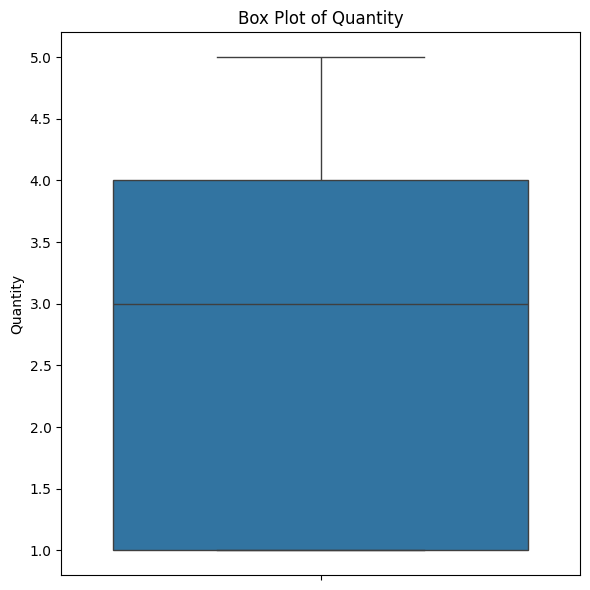

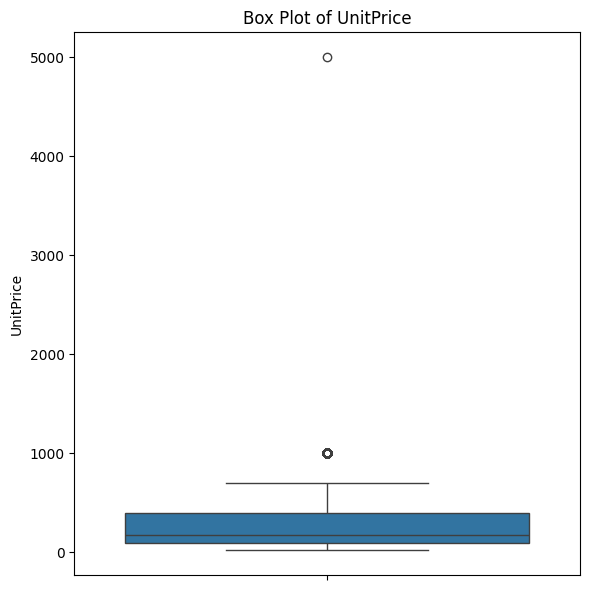

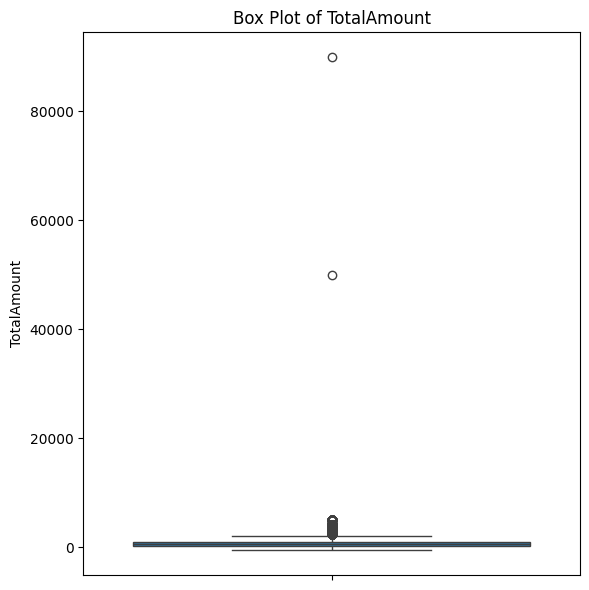

In [19]:
# Visualise box plots for 'Quantity', 'UnitPrice', and 'TotalAmount'
def visualise_box_plots(df, columns):
    for column in columns:
        plt.figure(figsize=(6, 6))
        sns.boxplot(df[column])
        plt.title(f'Box Plot of {column}')
        plt.tight_layout()
        plt.show()
        
visualise_box_plots(df, ['Quantity', 'UnitPrice', 'TotalAmount'])

In [20]:
def detect_outliers(df, columns, multiplier=3):
    """
    Identifies outliers based on IQR for specified columns.
    
    :param df: DataFrame.
    :param columns: Columns with potential outliers.
    :param multiplier: Multiplier for the IQR.
    :return: DataFrame with outliers for all specified columns.
    """
    outlier_mask = pd.Series(False, index=df.index)
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        column_outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_mask |= column_outliers
        
    outliers = df[outlier_mask]
    
    return outliers

# Detect outliers
detect_outliers(df, ['Quantity', 'UnitPrice', 'TotalAmount'])

,CustomerID,Name,Email,PurchaseDate,Product,Quantity,UnitPrice,TotalAmount
106,CUST00110,Eric Mosley,jennifer97@example.net,2023/06/18,Speaker,5,180.0,90000.0
126,CUST00130,Tracy Wise,blang@example.com,2018/06/08,Laptop,1,1000.0,4000.0
132,CUST00136,Veronica Horn,clewis@example.com,2018/03/12,Smartphone,5,700.0,3500.0
136,CUST00140,Lawrence Carson,chavezgregory@example.net,2015/12/23,Laptop,1,1000.0,5000.0
192,CUST00196,David Fowler,edward17@example.com,2016/01/04,Smartphone,5,700.0,3500.0
...,...,...,...,...,...,...,...,...
9871,CUST09875,Grant Meyer,alexisrush@example.org,2024/05/15,Laptop,4,1000.0,4000.0
9884,CUST09888,Christian Dudley,alexander16@example.com,2022/09/25,Smartphone,5,700.0,3500.0
9947,CUST09951,Dr. Brett Garcia,sandovalshelby@example.com,2019/07/08,Smartphone,5,700.0,3500.0
9987,CUST09991,Jason Reid,ortizalexandra@example.com,2020/10/21,Smartphone,5,700.0,3500.0


In [21]:
# As identified outliers seem legitimate, only specific rows with apparent data entry errors will be dropped
def drop_rows(df, indexes):
    """
    Drops rows based on specified indexes.
    
    :param df: DataFrame from which to drop rows.
    :param indexes: List of indexes to drop.
    :return: DataFrame with specified rows removed.
    """
    df.drop(indexes, inplace=True)
    return df

drop_rows(df, [319, 725, 761, 111])

,CustomerID,Name,Email,PurchaseDate,Product,Quantity,UnitPrice,TotalAmount
0,CUST00001,James Parker Jr.,lorimatthews@example.net,2020/11/24,Router,2,80.0,160.0
2,CUST00003,Margaret Weaver,vbutler@example.org,2015/11/11,Smartwatch,1,200.0,-2.0
3,CUST00004,Eric Vega,ubarnes@example.org,2024/01/18,Laptop,1,1000.0,3000.0
4,CUST00005,Alyssa Smith,goodmannichole@example.org,2024/06/30,Tablet,2,400.0,800.0
5,CUST00006,Scott Vargas,kevin01@example.com,2019/08/23,Router,1,80.0,80.0
...,...,...,...,...,...,...,...,...
9992,CUST09996,Victor Walker,colleendavila@example.com,2018/04/23,Camera,1,500.0,1500.0
9993,CUST09997,Kristen Fisher,jameslopez@example.net,2018/12/08,Camera,1,500.0,1500.0
9994,CUST09998,Makayla Arnold,myersjessica@example.org,2023/03/04,Tablet,4,400.0,1600.0
9995,CUST09999,William Walker,brad54@example.org,2023/12/03,Mouse,5,50.0,250.0
